## Chaikin Money Flow

$$N_t = \frac{(C_t - L_t) - (H_t - C_t)}{H_t - L_t}$$

$$M_t = N \times \mathrm{MA}(V_t)$$

$$\mathrm{ADL}_t = M_{t-1} + M_t$$
$$\mathrm{CO}_t = \mathrm{EMA}(\mathrm{ADL})_{t-3} - \mathrm{EMA}(\mathrm{ADL})_{t-10}$$

여기서 ADL은 accumulation distribution line이고 CO은 chaikin oscillator이다

### Documentation

Chaikin Money Flow (CMF)는 마크 차이킨에 의해 개발된 기술적 분석 도구로, 주식이나 다른 금융 자산에 대한 매수와 매도 압력을 측정하는 데 사용된다. CMF는 가격 움직임과 거래량을 통합하여 주식의 흐름을 평가한다. 이 지표는 특히 거래량과 가격의 관계를 분석하여 자산의 매수 또는 매도 압력을 파악하는 데 유용하다. Chaikin Money Flow는 보통 20일 또는 21일 동안의 데이터를 사용하여 계산한다.

CMF 값이 양수라면, 그 기간 동안 매수 압력이 매도 압력보다 강했다는 것을 의미하며, 주가 상승을 예상할 수 있다. 반대로 CMF 값이 음수라면, 매도 압력이 매수 압력보다 강해 주가 하락이 예상된다. CMF 값이 0에 가까우면, 매수와 매도 압력이 비슷하게 작용하고 있다는 것을 나타낸다.

CMF 지표는 시장의 추세 전환을 예측하는 데 도움이 될 수 있으며, 특히 다른 지표들과 함께 사용할 때 더욱 효과적일 수 있다.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ta.volume import chaikin_money_flow
import yfinance as yf

import warnings
warnings.filterwarnings('ignore')

start_date = '2023-01-01'
end_date = '2024-04-14'
ticker = '^GSPC'
data = yf.download(ticker, start = start_date, end = end_date)

[*********************100%%**********************]  1 of 1 completed


In [7]:
chaikin = chaikin_money_flow(
    high = data['High'],
    low = data['Low'],
    close = data['Close'],
    volume = data['Volume'],
    window = 20,
    fillna = False
)

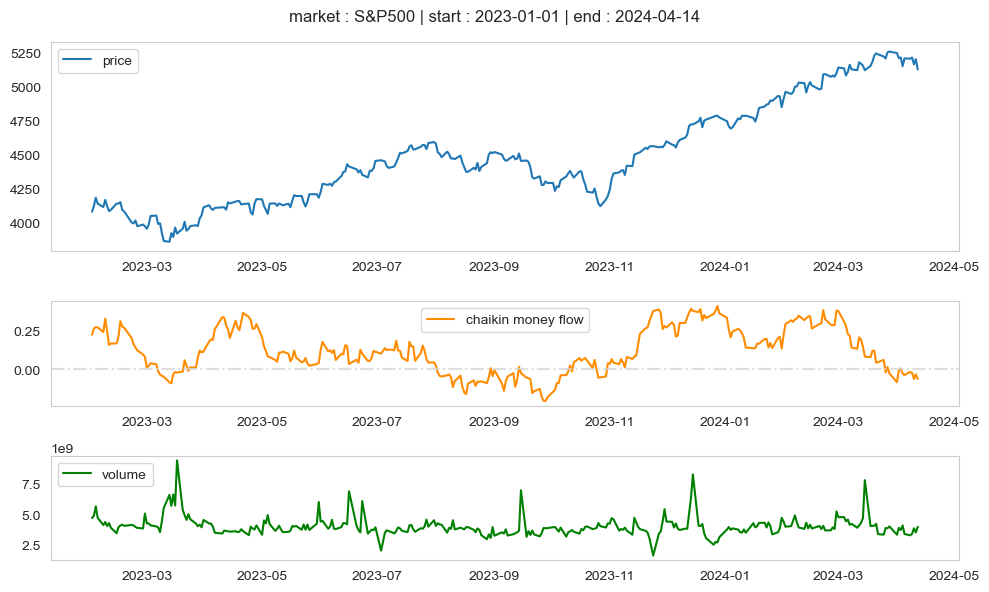

In [14]:
import matplotlib.gridspec as gridspec

plt.figure(figsize = (10, 6))
plt.subplot(3, 1, 1)
gs = gridspec.GridSpec(3, 1, height_ratios=[2, 1, 1]) 

plt.subplot(gs[0])
plt.plot(data['Close'][19:])
plt.grid(False)
plt.legend(['price'])

plt.subplot(gs[1])
plt.plot(chaikin, color = 'darkorange')
plt.grid(False)
plt.axhline(y = 0, color = 'lightgray', linestyle = '-.', alpha = 0.75)
plt.legend(['chaikin money flow'])

plt.subplot(gs[2])
plt.plot(data['Volume'][19:], color = 'green')
plt.grid(False)
plt.legend(['volume'])

plt.suptitle(f'market : S&P500 | start : {start_date} | end : {end_date}')
plt.tight_layout()
plt.show()